<IPython.core.display.Javascript object>


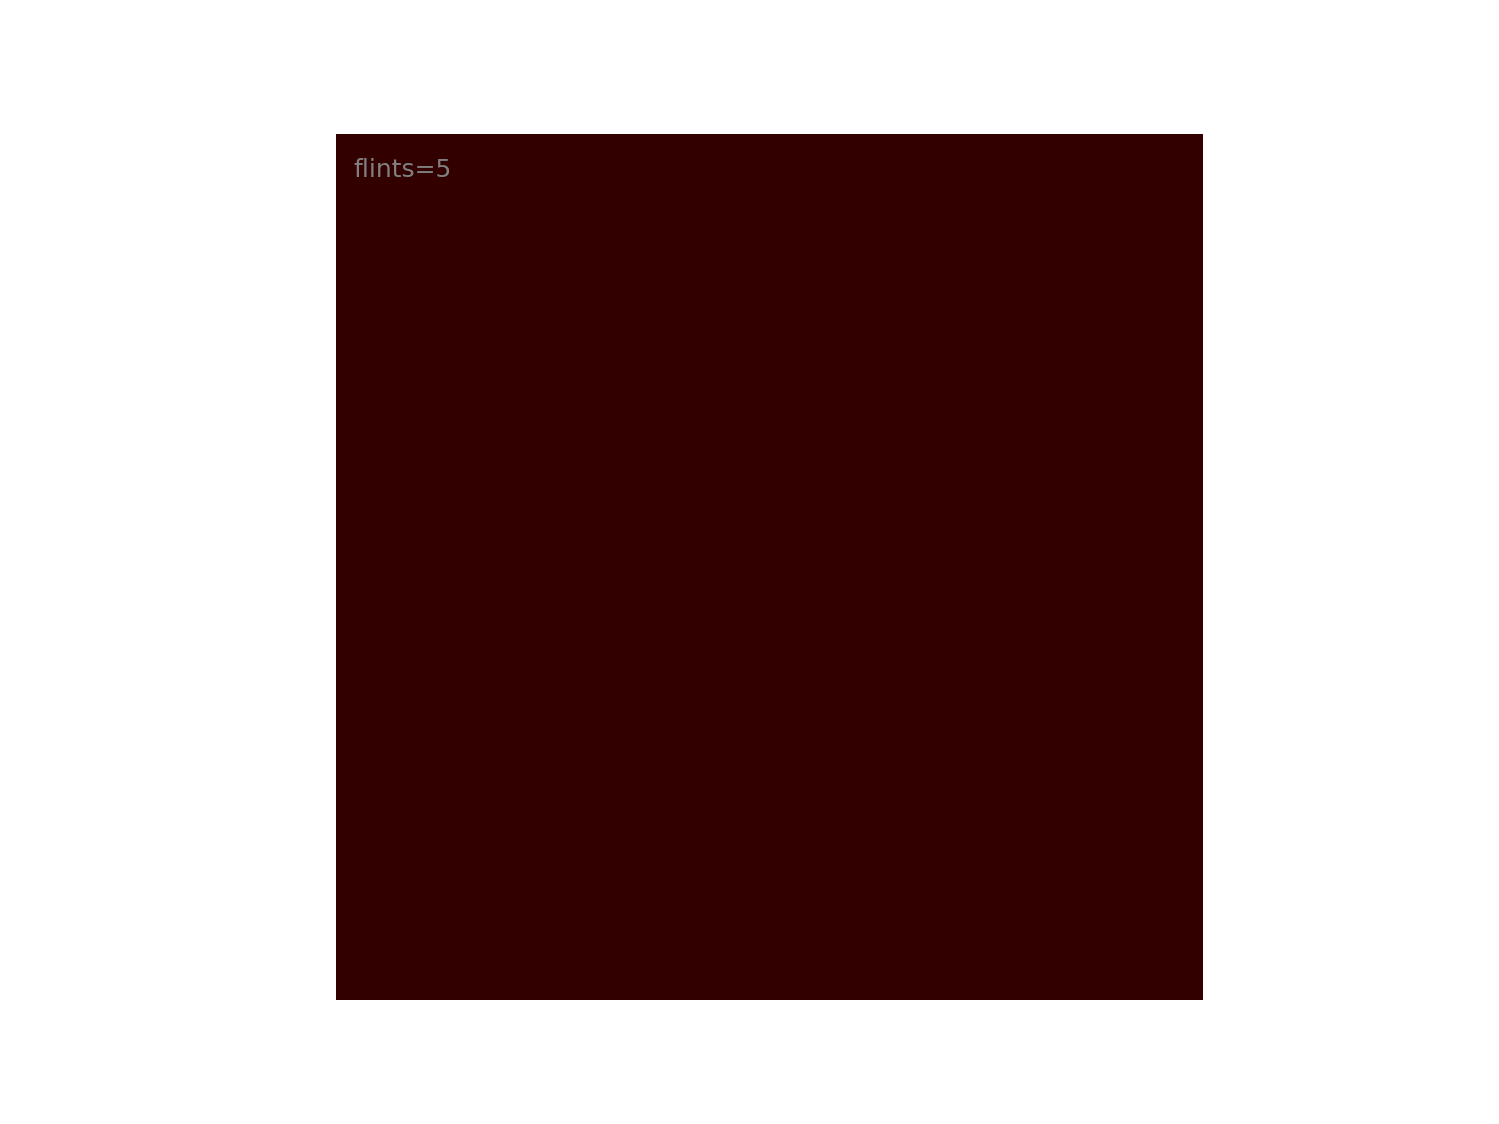

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
%matplotlib nbagg

# Displacements from a cell to its eight nearest neighbours
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)
flints = 0

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.00
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.00, 0.001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100
# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

for c in range(0,5):
    X_tree = np.random.normal(np.random.randint(1, nx-2, 1), 0.8, 50).astype('int32')
    Y_tree = np.random.normal(np.random.randint(1, ny-2, 1), 0.8, 50).astype('int32')
    for i in X_tree:
        for j in Y_tree:
            X[i, j] = 1
        
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm);#, interpolation='nearest')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color="grey")

In [2]:
# The animation function: called to produce a frame for each generation.
def animate(i):
    global flints, nx, ny, neighborhood
    im.set_data(animate.X)
    time_text.set_text('flints={:d}'.format(flints))
    
    X1 = np.zeros((ny, nx))
    burning = False
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if animate.X[iy, ix] == FIRE:
                burning = True
            if animate.X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                for dx,dy in neighbourhood:
                    if animate.X[iy+dy,ix+dx] == FIRE:
                        X1[iy,ix] = FIRE
                        break
                else:
                    if np.random.random() <= f and not burning:
                        X1[iy,ix] = FIRE
                        flints = flints + 1
    
    animate.X = X1
    

# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval, blit=True)
plt.show()